<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_3_3_%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 준비

In [ ]:
import pandas as pd
import numpy as np

#농어 길이, 높이, 두께 정보
df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()
print(perch_full)

In [3]:
#농어 무게 정보
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

#사이킷런 변환기

In [34]:
train_input[:3]

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12]])

In [30]:
from sklearn.preprocessing import PolynomialFeatures

#모든 경우의 수로 가능한 조합을 만드는 것. - 앞에서 한 x^2 추가하기의 다양한 버전
poly = PolynomialFeatures(degree=2, include_bias = False)
poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly)

[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]
 [  25.        6.44      3.68    625.      161.       92.       41.4736
    23.6992   13.5424]
 [  40.       11.93      7.11   1600.      477.2     284.4     142.3249
    84.8223   50.5521]
 [  39.       12.43      7.35   1521.      484.77    286.65    154.5049
    91.3605   54.0225]
 [  43.       11.93      7.28   1849.      512.99    313.04    142.3249
    86.8504   52.9984]
 [  22.        5.64      3.52    484.      124.08     77.44     31.8096
    19.8528   12.3904]
 [  20.        5.08      2.77    400.      101.6    

In [35]:
#특성이 어떻게 만들어졌는지 출력
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

#다중 회귀 모델 훈련

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target), lr.score(test_poly, test_target))

0.9903183436982125 0.9714559911594111


#규제

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#1. 릿지 회귀

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target))

0.9896101671037343 0.9790693977615387


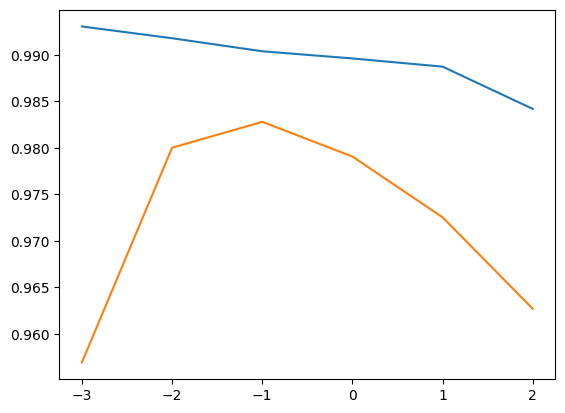

In [44]:
import matplotlib.pyplot as plt

#Ridge 회기 alpha값 변화시키며 실험
train_score, test_score = [], []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [45]:
#답: 0.1
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target))

0.9903815817570367 0.9827976465386928



#2. 라쏘 회귀

In [40]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target))

0.989789897208096 0.9800593698421883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

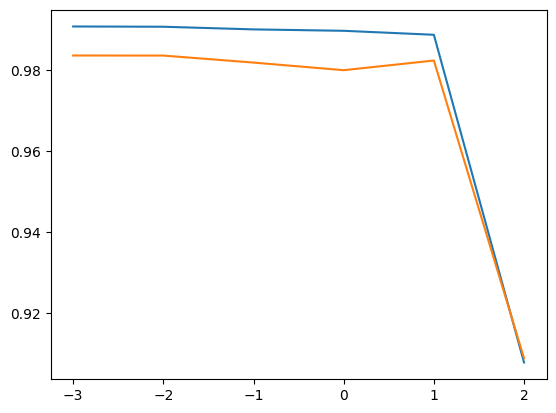

In [49]:
train_score, test_score = [], []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled, train_target)

  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [50]:
#답 - alpha : 1
lasso = Lasso(alpha = 1)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target))

0.989789897208096 0.9800593698421883


In [51]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        , 95.61184844, 11.60230215,
        0.        , 10.5804005 ,  0.        , 31.51508869,  0.        ,
       22.30028081,  0.        , 29.10414951,  0.        ,  0.        ,
       18.50441438,  0.        ,  0.        , 41.93702532,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        5.74835225,  0.        ,  0.        ,  0.        , 20.53363452,
        0.        ,  0.        ,  0.        ,  8.8783085 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 35.3124872 ,
        0.        ,  0.        ,  0.        ,  0.        , 21.35881131,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])